In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install pycountry

import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 문제

In [ ]:
"""
문제 :

예약 취소는 호텔의 매출에 영향을 끼치는 요소 중 하나인데요,
지금부터 여러분이 City Hotel과 Resort Hotel의 관리인이라고 상상해 보세요.

호텔 관리인으로서 예약 취소와 관련이 있는 요소들을 파악해보고,
예약 취소율을 줄이기 위한 아이디어도 생각해 볼 겁니다.

어떤 조건에서 예약 취소가 빈번하게 발생하는지, 예약 취소와 관련이 있는 요소들이 무엇인지 파악해보고,
마지막으로 어떻게 하면 예약 취소율을 개선할 수 있을지 아이디어도 얻어 보세요!

---

데이터 설명:

컬럼명                                                  설명
hotel                                   호텔명 (Resort Hotel 혹은 City Hotel)
is_canceled                             호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값
lead_time                               호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 날짜)
arrival_date_year                       고객의 호텔 도착 연도
arrival_date_month                      고객의 호텔 도착 월
arrival_date_week_number                고객의 호텔 도착 주 (예시: 2015년도 셋째 주에 도착 → arrival_date_week_number = 3)
arrival_date_day_of_month              	고객의 호텔 도착 일 (예시: 3월 2일에 도착 → arrival_date_day_of_month = 2)
stays_in_weekend_nights                 고객이 호텔에 숙박했거나 예약한 주말 밤 수(토요일~일요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_weekend_nights = 2)
stays_in_week_nights	                고객이 호텔에 숙박했거나 예약한 주중 밤 수(월요일~금요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_week_nights = 3)
adults	                                예약된 어른의 수
children	                            예약된 어린이의 수
babies	                                예약된 아기의 수
meal	                                예약된 식사 유형
    - Undefined/SC: 식사 포함되지 않은 옵션
    - BB: Bed & Breakfast 옵션
    - HB: Half board (아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션
    - FB: Full board (아침, 점심, 저녁)
country	                                투숙객의 출신 국가. 카테고리는 ISO 3155-3:2013 형식으로 표시 (국가 표기 코드는 링크 참조)
market_segment	                        시장 세그먼트. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.
distribution_channel	                예약 유통 채널. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.
is_repeated_guest	                    이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값
previous_cancellations	                현재 예약 이전에 고객이 취소한 이전 예약 수
previous_bookings_not_canceled	        현재 예약 이전에 고객이 취소하지 않은 이전 예약 수
reserved_room_type	                    예약한 룸 타입 코드
assigned_room_type	                    배정된 룸 타입 코드. 호텔 운영상의 이유(ex. 초과 예약 등) 또는 고객 요청으로 인해 예약한 객실과 다른 객실 유형이 배정되는 경우가 존재.
booking_changes	                        예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수
agent	                                예약을 진행한 여행사의 ID
company	                                예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID
days_in_waiting_list	                예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수
required_car_parking_spaces	            고객이 요구하는 주차 공간 수
total_of_special_requests	            고객의 특별 요청 건수 (ex. 트윈 베드, 아기 침대, 고층, 특별한 뷰 등)
reservation_status	                    예약의 마지막 상태, 총 3가지 카테고리로 구성
    - Canceled: 고객이 예약을 취소함
    - Check-Out: 고객이 체크인을 하고 체크아웃을 함
    - No-Show: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음.
reservation_status_date	                마지막 예약 상태(reservation_status)가 설정된 날짜.

---

목표 : 예약 취소에 영향을 주는 요인을 파악하고, 취소율을 낮출 수 있는 전략을 제시 해보자.

---

분석 플랜

1. 기본 전처리
2. 예약 취소율 파악
3. 요인별 취소율 시각화 및 인사이트
4. 고객 특성에 따른 분석
5. 개선 아이디어 도출

---

참조:

 - https://pypi.org/project/pycountry/ # country 데이터 가공
 - https://brunch.co.kr/@data/10 # 데이터 분석 절차
 - https://chaheekwon.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC%EC%9D%98-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%A4%91%EC%9A%94%EC%84%B1  # 데이터 전처리 중요성과 예시
 - https://dykm.tistory.com/75#%EA%B2%B0%EC%B8%A1%EC%B9%98%20%EC%B2%98%EB%A6%AC%20%EB%B0%A9%EB%B2%95%20%EC%98%88%EC%8B%9C%20(Handling%20Missing%20Data)-1  # 처리 방법

"""

In [3]:
eng_to_kor_dict = {
    "hotel": "호텔 이름",
    "is_canceled": "취소여부",
    "lead_time": "예약-도착일",
    "arrival_date_year": "호텔 도착(년)",
    "arrival_date_month": "호텔 도착(월)",
    "arrival_date_week_number": "호텔 도착(주)",
    "arrival_date_day_of_month": "호텔 도착(일)",
    "stays_in_weekend_nights": "주말 일수",
    "stays_in_week_nights": "주중 일수",
    "adults": "어른 수",
    "children": "어린이 수",
    "babies": "아기 수",
    "meal": "식사 유형",
    "country": "국가",
    "market_segment": "마켓",
    "distribution_channel": "예약 채널",
    "is_repeated_guest": "재방문 여부",
    "previous_cancellations": "취소 예약 수",
    "previous_bookings_not_canceled": "예약 수행 수",
    "reserved_room_type": "예약 룸",
    "assigned_room_type": "배정 룸",
    "booking_changes": "예약 변경 수",
    "agent": "여행사",
    "company": "회사/단체",
    "days_in_waiting_list": "예약확정 대기일수",
    "required_car_parking_spaces": "주차 요구 공간 수",
    "total_of_special_requests": "특별 요청 건수",
    "reservation_status": "상태",
    "reservation_status_date": "수정일",
}
# read dataset
df = pd.read_csv("/content/drive/MyDrive/코드잇/hotel_data_modified.csv").rename(columns=eng_to_kor_dict)

In [5]:
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

eng_to_kor_dict = {
    "hotel": "호텔 이름",
    "is_canceled": "취소여부",
    "lead_time": "예약-도착일",
    "arrival_date_year": "호텔 도착(년)",
    "arrival_date_month": "호텔 도착(월)",
    "arrival_date_week_number": "호텔 도착(주)",
    "arrival_date_day_of_month": "호텔 도착(일)",
    "stays_in_weekend_nights": "주말 일수",
    "stays_in_week_nights": "주중 일수",
    "adults": "어른 수",
    "children": "어린이 수",
    "babies": "아기 수",
    "meal": "식사 유형",
    "country": "국가",
    "market_segment": "마켓",
    "distribution_channel": "예약 채널",
    "is_repeated_guest": "재방문 여부",
    "previous_cancellations": "취소 예약 수",
    "previous_bookings_not_canceled": "예약 수행 수",
    "reserved_room_type": "예약 룸",
    "assigned_room_type": "배정 룸",
    "booking_changes": "예약 변경 수",
    "agent": "여행사",
    "company": "회사/단체",
    "days_in_waiting_list": "예약확정 대기일수",
    "required_car_parking_spaces": "주차 요구 공간 수",
    "total_of_special_requests": "특별 요청 건수",
    "reservation_status": "상태",
    "reservation_status_date": "수정일",
}
# read dataset
df = pd.read_csv("./hotel_data_modified.csv").rename(columns=eng_to_kor_dict)

In [2]:
# pycountry.countries.get(alpha_3='KOR')

print("(행, 열) 개수:", df.shape)
print("컬럼명 목록:", df.columns)
print("데이터 타입:", df.dtypes)
df.head()

# 결측치 갯수 확인
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

# 회사/단체, 여행사의 결측치는 개인이나 여행사없이 예약했다고 볼 수 있을듯

# children 컬럼에 결측치가 있다면 0으로 대체
df['어린이 수'].fillna(0, inplace=True)

# country 결측치가 있다면 'Unknown'으로 대체
df['국가'].fillna('Unknown', inplace=True)

# 어른, 어린이, 아이가 0 이다 ?? 180 row
사람이없는예약 = df[(df['어른 수'] == 0) & (df['어린이 수'] == 0) & (df['아기 수'] == 0)]
사람이없는예약.index

(행, 열) 개수: (119390, 29)
컬럼명 목록: Index(['호텔 이름', '취소여부', '예약-도착일', '호텔 도착(년)', '호텔 도착(월)', '호텔 도착(주)',
       '호텔 도착(일)', '주말 일수', '주중 일수', '어른 수', '어린이 수', '아기 수', '식사 유형', '국가',
       '마켓', '예약 채널', '재방문 여부', '취소 예약 수', '예약 수행 수', '예약 룸', '배정 룸',
       '예약 변경 수', '여행사', '회사/단체', '예약확정 대기일수', '주차 요구 공간 수', '특별 요청 건수', '상태',
       '수정일'],
      dtype='object')
데이터 타입: 호텔 이름          object
취소여부            int64
예약-도착일          int64
호텔 도착(년)        int64
호텔 도착(월)       object
호텔 도착(주)        int64
호텔 도착(일)        int64
주말 일수           int64
주중 일수           int64
어른 수            int64
어린이 수         float64
아기 수            int64
식사 유형          object
국가             object
마켓             object
예약 채널          object
재방문 여부          int64
취소 예약 수         int64
예약 수행 수         int64
예약 룸           object
배정 룸           object
예약 변경 수         int64
여행사           float64
회사/단체         float64
예약확정 대기일수       int64
주차 요구 공간 수      int64
특별 요청 건수        int64
상태             object
수정일        

/var/folders/x_/3_f7q6q13z5btwymqrlxs_4m0000gn/T/ipykernel_9796/142401100.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['어린이 수'].fillna(0, inplace=True)
/var/folders/x_/3_f7q6q13z5btwymqrlxs_4m0000gn/T/ipykernel_9796/142401100.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,  32029,
        32827,
       ...
       112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251, 116534,
       117087],
      dtype='int64', length=180)

In [ ]:
"""
 예약 취소율 기본이 뭘까

 - 전체 예약 대비 취소율?
 - 호텔별 취소율?
 - 년도, 월, 주, 일, 시즌 별 취소율 차이가 있는가?

 ---

 취소율과 변수와의 관계

 변수                        가설

 days_in_waiting_list       예약 확정까지의 대기 일수가 길수록 취소율이 높을 것 같음

 lead_time                  리드 타임이 길수록 취소 확률이 높을 것 같음

 is_repeated_guest          재방문 고객은 취소율이 낮을 것 같음

 reserved_room_type         원하던 방이 아닐경우 취소율이 높을 수 있음
 assigned_room_type,

 total_of_special_requests  특별 요청이 많은 경우 취소율이 낮을 것 같음

 booking_changes            변경이 잦을수록 취소율이 높을 것 같음

 meal,country,              특정 그룹 특성에 따라 차이 있을 수 있음
 agent,company,
 market_segment,
 distribution_channel

 ---

 목표:

 1. 예약 취소율은 실제로 얼마나 되는가?
 2. 어떤 요인이 취소를 유도 하는가?
 3. 이 요인을 어떻게 줄일 수 있을까?

 ---

"""

# 취소 요인 분석


## 전체 예약 취소 수

(119390, 29)
호텔명 | 예약 수 | 예약 취소 수 | 예약 취소율
전체:  119390 44224 37.04 %
Resort Hotel:  28938 11122 27.76 %
City Hotel:  46228 33102 41.73 %


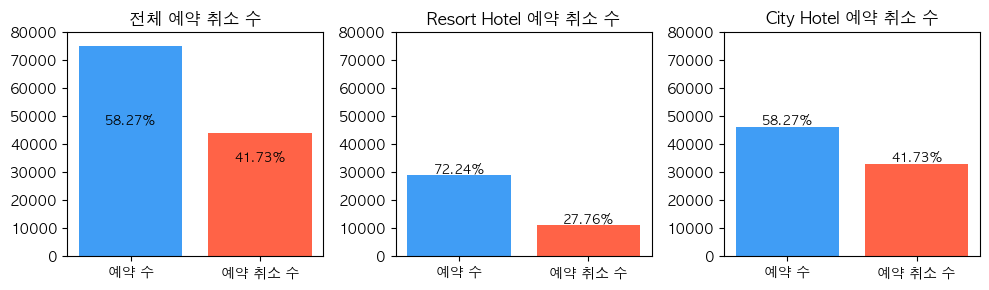

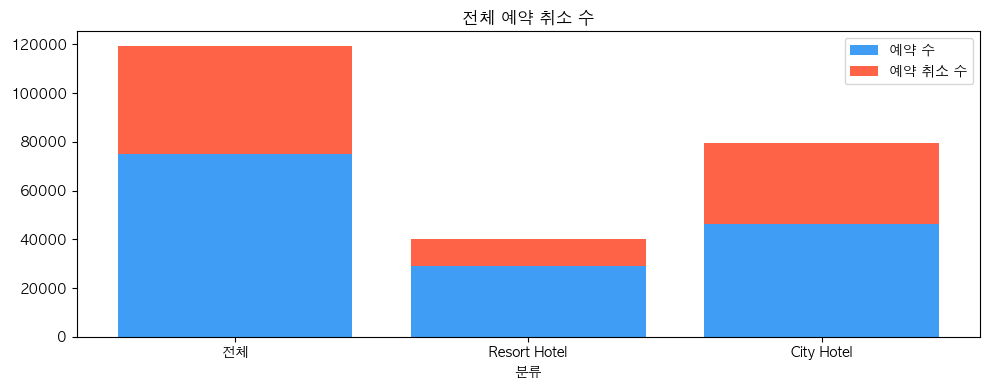

In [187]:
import math

# 총 갯수
print(df.shape)
print('호텔명', '|', '예약 수', '|', '예약 취소 수', '|', '예약 취소율')
print('전체: ', df.count()['취소여부'], df[df['취소여부'] == 1].count()['취소여부'], round(df[df['취소여부'] == 1].count()['취소여부'] / df.count()['취소여부'] * 100, 2), '%')
print('Resort Hotel: ', df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] != 1)].count()['취소여부'], df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'], round(df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'] / df[(df['호텔 이름'] == 'Resort Hotel')].count()['취소여부'] * 100, 2), '%')
print('City Hotel: ', df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] != 1)].count()['취소여부'], df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'], round(df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'] / df[(df['호텔 이름'] != 'Resort Hotel')].count()['취소여부'] * 100, 2), '%')

hotels = df['호텔 이름'].unique()

colors = ['#409df5', 'tomato']

plt.figure(figsize=(10, 3))

for i, hotel in enumerate(hotels):
    subset = df[df['호텔 이름'] == hotel]
    counts = subset['취소여부'].value_counts().sort_index()  # 0: not canceled, 1: canceled

    plt.subplot(1, 3, i + 2)
    plt.bar(['예약 수', '예약 취소 수'], counts, color=colors)
    plt.yticks(range(0, (math.ceil(df['취소여부'].value_counts().sort_index()[0]/10000) * 10000) + 1, 10000))
    plt.title(f"{hotel} 예약 취소 수")
    total = counts.sum()
    for j, val in enumerate(counts):
        rate = val / total
        plt.text(j, val + 0.02, f"{rate:.2%}", ha='center', va='bottom', color='black', fontsize=9)
    

plt.subplot(1, 3, 1)
plt.bar(['예약 수', '예약 취소 수'], df['취소여부'].value_counts().sort_index(), color=colors)
total = counts.sum()
for j, val in enumerate(counts):
    rate = val / total
    plt.text(j, val + 0.02, f"{rate:.2%}", ha='center', va='bottom', color='black', fontsize=9)
plt.yticks(range(0, (math.ceil(df['취소여부'].value_counts().sort_index()[0]/10000) * 10000) + 1, 10000))
plt.title('전체 예약 취소 수')

plt.tight_layout()
plt.show()

# 한눈에 보기
colors = ['#409df5', 'tomato']

cancel_df = df[df['취소여부'] > 0].reset_index()
not_cancel_df = df[df['취소여부'] == 0].reset_index()

plt.figure(figsize=(10, 4))

plt.bar(
    ['전체', 'Resort Hotel', 'City Hotel'], [
    not_cancel_df['취소여부'].value_counts()[0], 
    not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[0], 
    not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[0]
  ], 
  color='#409df5', 
  label='예약 수'
)
plt.bar(
    ['전체', 'Resort Hotel', 'City Hotel'], [
    cancel_df['취소여부'].value_counts()[1], 
    cancel_df[cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[1], 
    cancel_df[cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[1]
  ], 
  bottom=[
    not_cancel_df['취소여부'].value_counts()[0], 
    not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[0], 
    not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[0]
  ], 
  color='tomato', 
  label='예약 취소 수'
)

for i, hotel in enumerate(['Resort Hotel', 'City Hotel']):
    total = not_cancel_df[not_cancel_df['호텔 이름'] == hotel]['취소여부'].value_counts()[0] + cancel_df[cancel_df['호텔 이름'] == hotel]['취소여부'].value_counts()[1]
    cancel_count = cancel_df[cancel_df['호텔 이름'] == hotel]['취소여부'].value_counts()[1]
    rate = cancel_count / total

plt.title('전체 예약 취소 수')
plt.xlabel('분류')
plt.legend()

plt.tight_layout()
plt.show()

## 가설 1. 예약 확정까지의 대기 일수가 길수록 취소율이 높을 것이다.

### 대기일 구간별 전체 예약 수와 예약 취소율

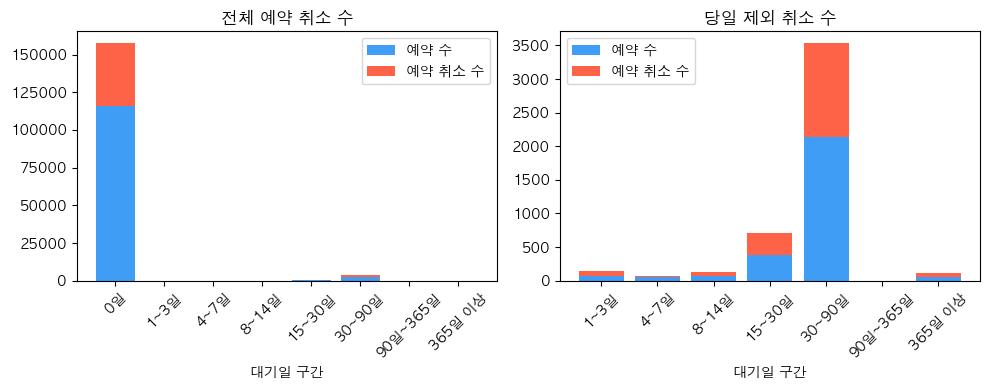

posx and posy should be finite values
posx and posy should be finite values


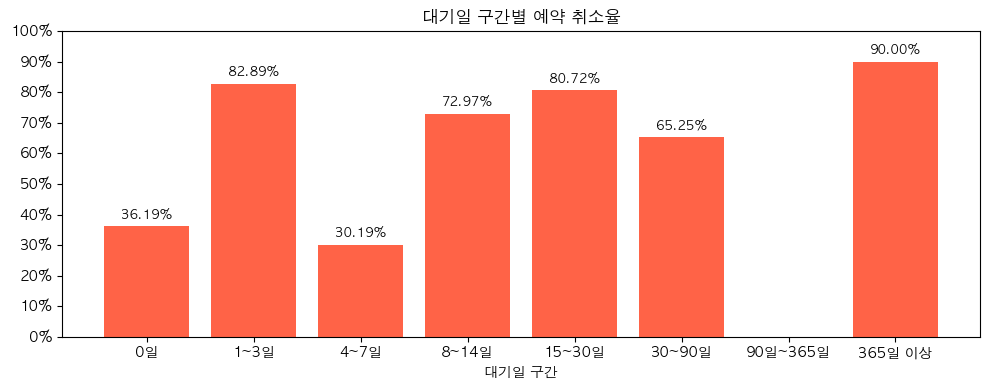

In [145]:
# 대기일수 구간 만들기
waiting_range = ["0일", "1~3일", "4~7일", "8~14일", "15~30일", "30~90일", "90일~365일", "365일 이상"]
def waiting_bin(days):
    if days == 0:
        return "0일"
    elif days <= 3:
        return "1~3일"
    elif days <= 7:
        return "4~7일"
    elif days <= 14:
        return "8~14일"
    elif days <= 30:
        return "15~30일"
    elif days <= 90:
        return "30~90일"
    elif days <= 365:
        return "90~365일"
    else:
        return "365일 이상"

new_df = df.copy() # 깊은 복사로 원본은 유지
new_df['waiting_bin'] = new_df['예약확정 대기일수'].apply(waiting_bin)

# 한눈에 보기
plt.figure(figsize=(10, 4))

# 대기일 구간별 예약 수와 취소 수 시각화
plt.subplot(1, 2, 1)
plt.bar(
    waiting_range, 
    [new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='#409df5',
    label='예약 수'
)
plt.bar(
    waiting_range, 
    [new_df[new_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range],
    bottom=[new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='tomato',
    label='예약 취소 수'
)
plt.title('전체 예약 취소 수')
plt.xlabel('대기일 구간')
plt.xticks(rotation=45)
plt.legend()

# 대기일 구간별 예약 수와 취소 수 시각화 (당일 제외)
plt.subplot(1, 2, 2)
plt.bar(
    waiting_range[1:], 
    [new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
    color='#409df5',
    label='예약 수'
)
plt.bar(
    waiting_range[1:], 
    [new_df[new_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range[1:]],
    bottom=[new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
    color='tomato',
    label='예약 취소 수'
)
plt.title('당일 제외 취소 수')
plt.xlabel('대기일 구간')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 대기일 구간별 예약 취소율 시각화
plt.figure(figsize=(10, 4))
plt.bar(
    waiting_range, 
    [new_df[new_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range],
    color='tomato',
)
plt.title('대기일 구간별 예약 취소율')
plt.xlabel('대기일 구간')
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
for i, v in enumerate([new_df[new_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range]):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 호텔별 대기일 구간별 전체 예약 수와 예약 취소율

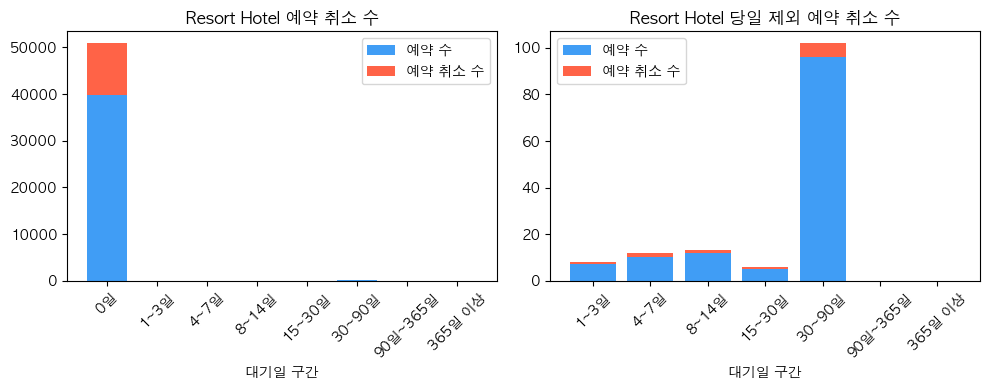

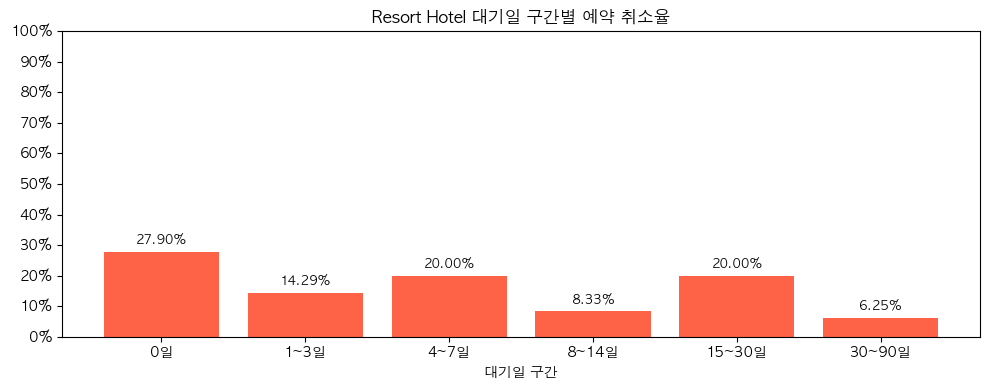

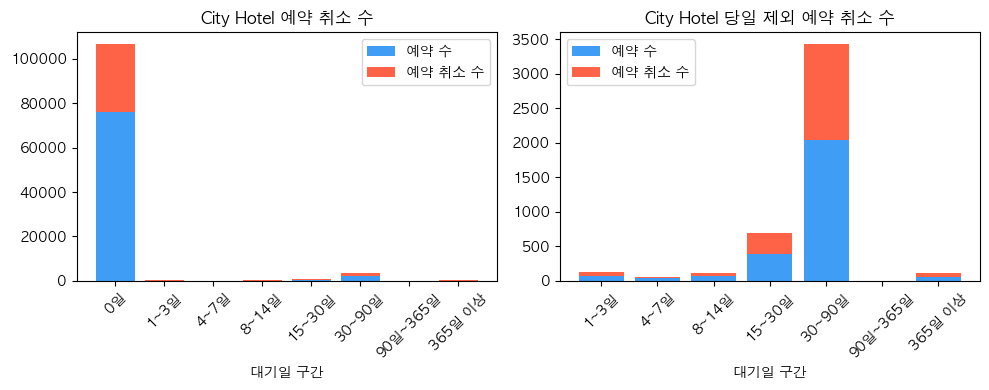

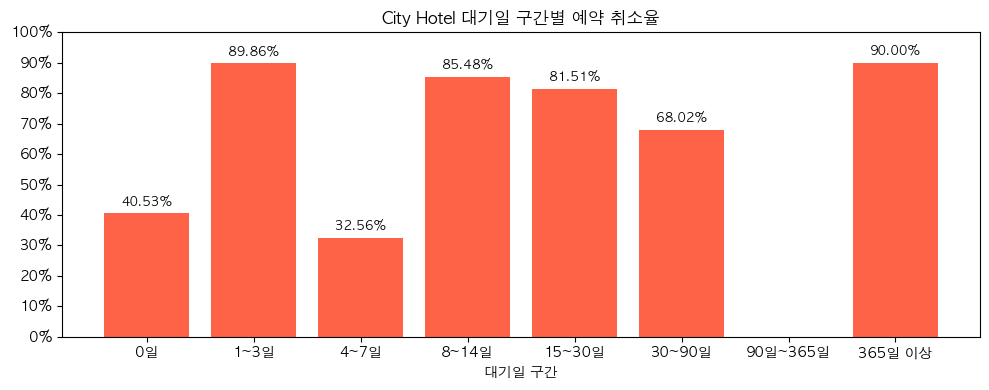

In [146]:
# 호텔별 대기일 구간별 예약 수와 취소 수 시각화
for i, hotel in enumerate(hotels):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    hotel_df = new_df[new_df['호텔 이름'] == hotel]
    plt.bar(
        waiting_range, 
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='#409df5',
        label='예약 수'
    )
    plt.bar(
        waiting_range, 
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range],
        bottom=[hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='tomato',
        label='예약 취소 수'
    )
    plt.title(f'{hotel} 예약 취소 수')
    plt.xlabel('대기일 구간')
    plt.xticks(rotation=45)
    plt.legend()

# 호텔별 대기일 구간별 예약 수와 취소 수 시각화 (당일 제외)
    plt.subplot(1, 2, 2)
    hotel_df = new_df[new_df['호텔 이름'] == hotel]
    plt.bar(
        waiting_range[1:], 
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
        color='#409df5',
        label='예약 수'
    )
    plt.bar(
        waiting_range[1:], 
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range[1:]],
        bottom=[hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
        color='tomato',
        label='예약 취소 수'
    )
    plt.title(f'{hotel} 당일 제외 예약 취소 수')
    plt.xlabel('대기일 구간')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 호텔별 대기일 구간별 예약 취소율 시각화
    plt.figure(figsize=(10, 4))
    plt.bar(
        waiting_range,
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range],
        color='tomato'
    )
    plt.title(f'{hotel} 대기일 구간별 예약 취소율')
    plt.xlabel('대기일 구간')
    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
    for i, v in enumerate([hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range]):
        if not np.isnan(v):
            plt.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    

## 가설 2. 리드 타임이 길수록 취소 확률이 높을 것이다.

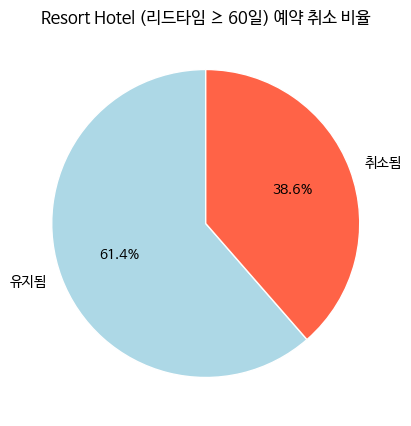

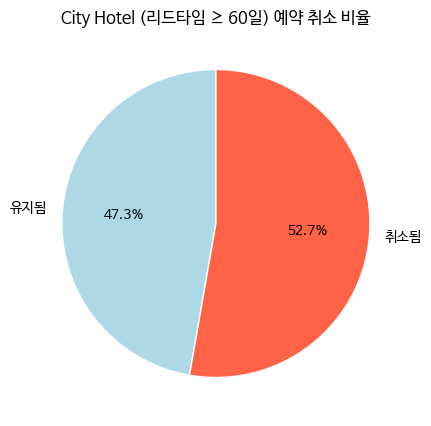

In [144]:
# 리드타임이 긴 경우 정의 (예: 60일 이상)
long_lead_df = df[df['예약-도착일'] >= 60]

# 호텔별로 파이차트 그리기
for hotel in long_lead_df['호텔 이름'].unique():
    subset = long_lead_df[long_lead_df['호텔 이름'] == hotel]
    counts = subset['취소여부'].value_counts().sort_index()  # 0, 1 순서

    labels = ['유지됨', '취소됨']
    colors = ['lightblue', 'tomato']

    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, wedgeprops={'edgecolor': 'white'})
    plt.title(f"{hotel} (리드타임 ≥ 60일) 예약 취소 비율")
    plt.show()

## 가설 3. 재방문 고객은 취소율이 낮을 것이다.

## 가설 4. 원하던 방이 아닐경우 취소율이 높을 것이다.

## 가설 5. 특별 요청이 많은 경우 취소율이 낮을 것이다.

## 가설 6. 변경이 잦을수록 취소율이 높을 것이다.

## 특정 그룹 특성에 따른 차이

In [ ]:
# 전체 예약 대비 취소율
cancel_rate = df['취소여부'].value_counts(normalize=True)
cancel_rate

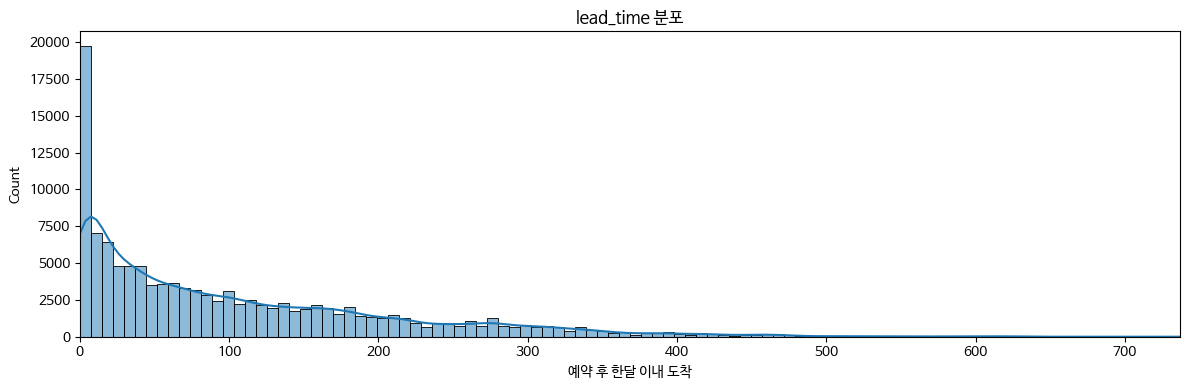

In [ ]:
# 예약 후 도착 기간

plt.figure(figsize=(12, 4))

sns.histplot(df['lead_time'], bins=100, kde=True)
plt.title("lead_time 분포")
plt.xlabel("예약 후 한달 이내 도착")

plt.xlim(0, df['lead_time'].max())

plt.tight_layout()
plt.show()

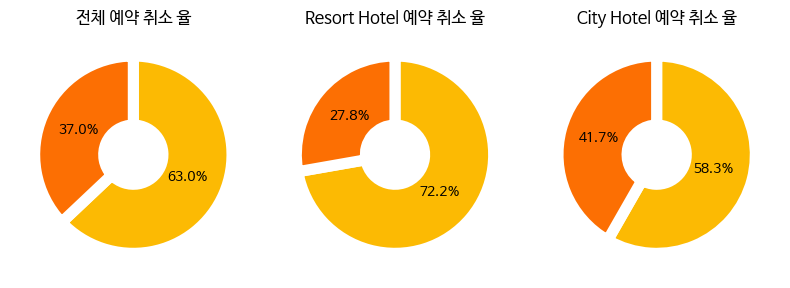

In [80]:
plt.figure(figsize=(8, 4))

hotels = df['호텔 이름'].unique()

colors = ['#fcba03', '#fc6f03']

# 2. 반복하며 호텔별 파이차트 그리기
for i, hotel in enumerate(hotels):
    subset = df[df['호텔 이름'] == hotel]
    counts = subset['취소여부'].value_counts().sort_index()  # 0: not canceled, 1: canceled

    plt.subplot(1, 3, i + 2)
    plt.pie(counts, colors=colors, autopct='%.1f%%', counterclock=False, startangle=90, wedgeprops={'width': 0.7,'edgecolor': 'w', 'linewidth': 8})
    plt.title(f"{hotel} 예약 취소 율")

plt.subplot(1, 3, 1)
plt.pie(df['취소여부'].value_counts().sort_index(), colors=colors, autopct='%.1f%%', counterclock=False, startangle=90, wedgeprops={'width': 0.7,'edgecolor': 'w', 'linewidth': 8})
plt.title("전체 예약 취소 율")
plt.xlabel(f"전체 예약 취소율: {total_cancel_rate:.2%}")

plt.tight_layout()
plt.show()